### Purpose of this notebook:

- data exploration and visualization

In [2]:
import requests
import os
import pandas as pd
from pandas.io.json import json_normalize
import numpy as np
import time
from joblib import delayed, Parallel
import datetime
# helper functions:
import helpers
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)

%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [72]:
data = pd.read_csv('openFDA_data/data/combined_weekly_sample_20200514.csv');

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (13,15,17,21,28,36,40,45,58) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Let's get a sense of the sample data:

- The sample of data we pulled has 63800 rows and 85 columns, with event dates ranging from January 2010 to March 2020. Note: the total data set consists of over 1.2 million records, so the data we are working with here is only a small representation of the complete picture

- There are quite a few columns with incomplete data, we'll need to do some data QC to select more useful features

In [73]:
data.shape

(53400, 85)

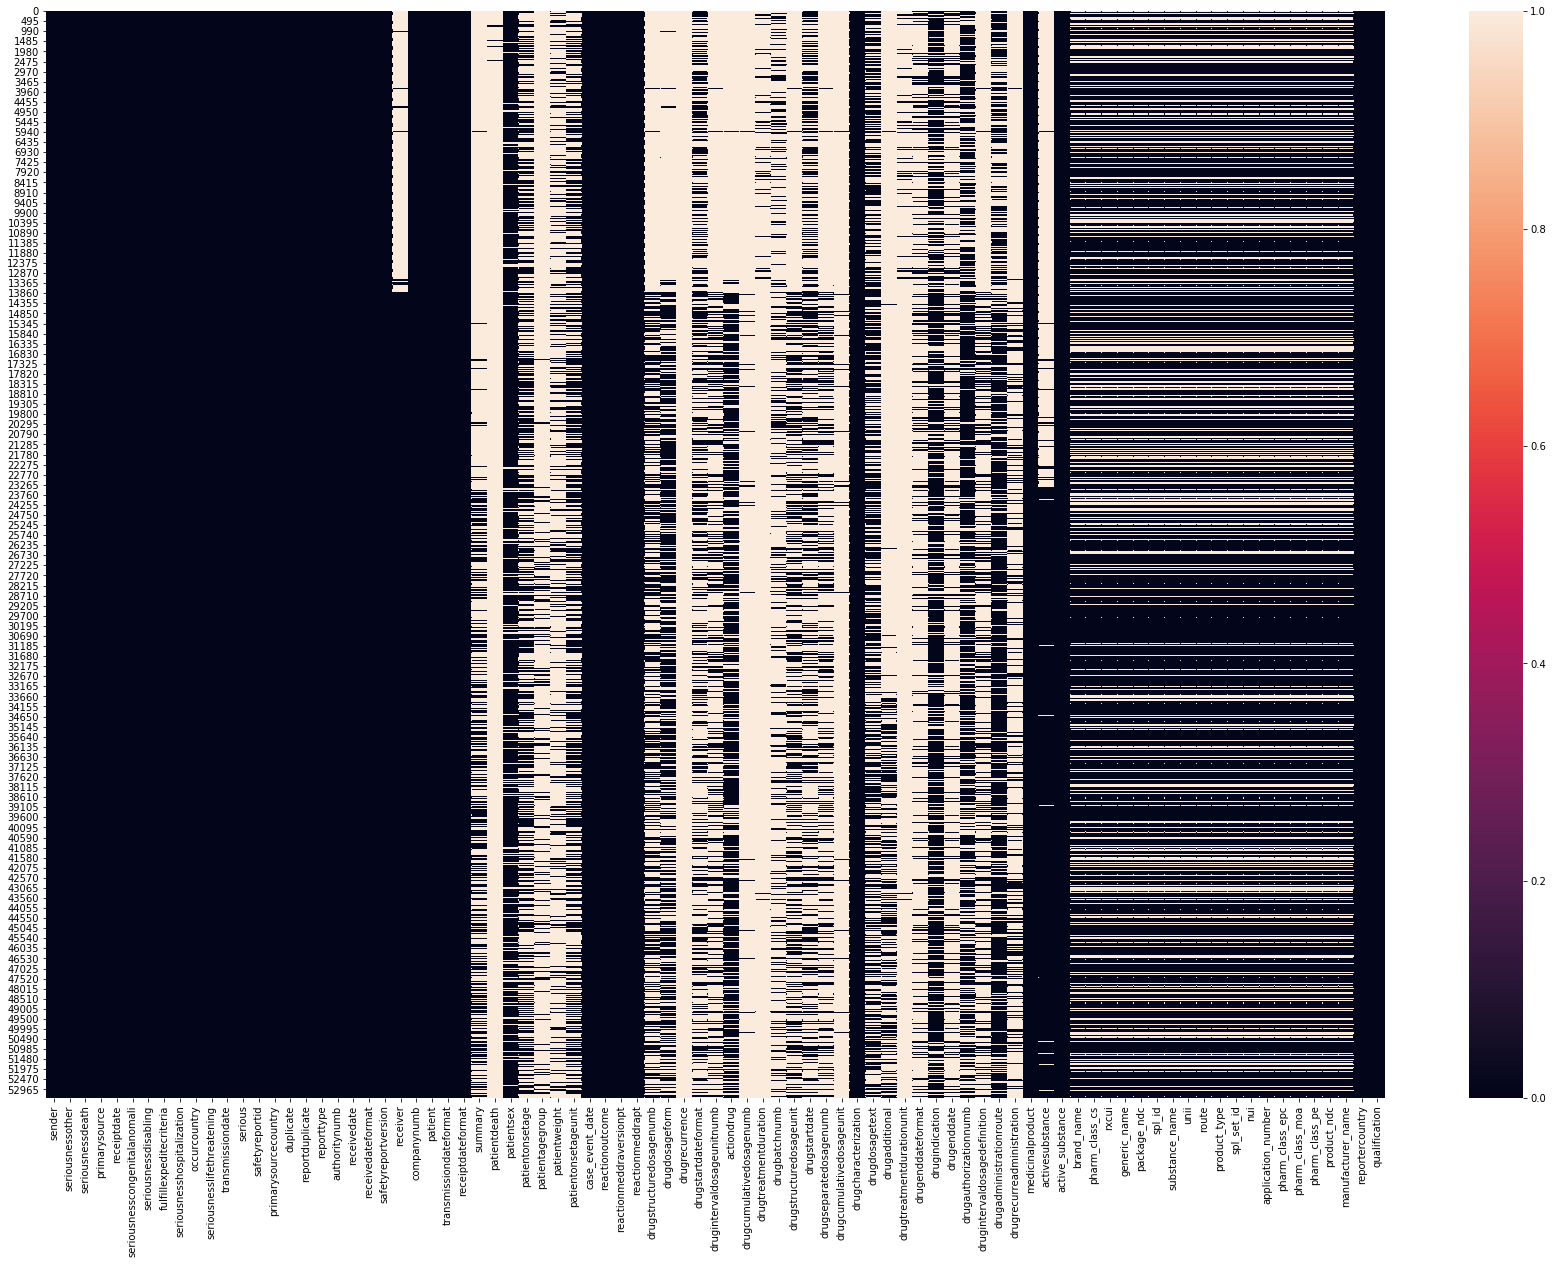

In [76]:
plt.figure(figsize=(30,20))
missing_data_count = sns.heatmap(data.isnull(), cbar = True)
#sns.barplot(data_var)
missing_data_count. savefig("missing_data_count.png")

In [60]:
missing_df = data.isnull()

missing_df_info = pd.DataFrame(data = {'missing_count':missing_df[missing_df==True].count(axis=0)/len(data)})
#data_var = pd.DataFrame(data = {'column_var':data.var(axis = 0)})
#data_count = pd.DataFrame(data = {'column_count':data_subset.nunique(axis = 0)}) 

In [61]:
nested_keys = ['primarysource','sender','patient','receiver','reportduplicate']
informative_vars = [val for val in set(missing_df_info[missing_df_info['missing_count']<0.6].index) - set(nested_keys)]

In [62]:
data_subset = data[informative_vars]

data_subset.shape

(63800, 61)

In [71]:
data['pa']

KeyError: 'patient'